# Additional Exercises Solution


### 0. Reading in and pre-processing data

In [35]:
#first, import the necessary modules
import numpy as np 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import ward, dendrogram

import os  # for os.path.basename
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

## Exercises
1. Indentify the differences btw these strings. Can you group by eyes them without using sklearn?
2. Find the Euclidian distance for the 5 texts below.
3. Find cosine distance for the 5 texts below.
4. Visualize the potential clusters using a dendrogram.
5. Also visualize it using mds

In [67]:
text0 = """Shall I compare thee to a summer’s day?\
Thou art more lovely and more temperate:\
Rough winds do shake the darling buds of May,\
And summer’s lease hath all too short a date:\
Sometime too hot the eye of heaven shines,\
And often is his gold complexion dimm’d;\
And every fair from fair sometime declines,\
By chance or nature’s changing course untrimm’d;"""


text1 = """But thy eternal summer shall not fade\
Nor lose possession of that fair thou owest;\
Nor shall Death brag thou wander’st in his shade,\
When in eternal lines to time thou growest:\
So long as men can breathe or eyes can see,\
So long lives this and this gives life to thee."""


text2 = """The Dursleys had everything they wanted,\
but they also had a secret, and their greatest fear was that somebody would discover it.\
They didn't think they could bear it if anyone found out about the Potters.\
Mrs. Potter was Mrs. Dursley's sister, but they hadn't met for several years;\
"""


text3 = """in fact, Mrs. Dursley pretended she didn't have a sister, because her\
sister and her good-for-nothing husband were as unDursleyish as it was possible to be.\
The Dursleys shuddered to think what the neighbors would say if the Potters arrived in the street.\
The Dursleys knew that the Potters had a small son, too, but they had never even seen him.\
This boy was another good reason for keeping the Potters away;\
they didn't want Dudley mixing with a child like that."""

text4 = """Nicolo Machiavelli was born at Florence on 3rd May 1469. \
He was the second son of Bernardo di Nicolo Machiavelli, \
a lawyer of some repute, and of Bartolommea di Stefano Nelli, his wife.\
Both parents were members of the old Florentine nobility.\
His life falls naturally into three periods, each of which singularly enough constitutes \
a distinct and important era in the history of Florence. His youth was concurrent with the greatness \
of Florence as an Italian power under the guidance of Lorenzo de' Medici, Il Magnifico. \
The downfall of the Medici in Florence occurred in 1494, in which year Machiavelli entered the public service.\
During his official career Florence was free under the government of a Republic, which lasted until 1512,\
when the Medici returned to power, and Machiavelli lost his office. \
The Medici again ruled Florence from 1512 until 1527, when they were once more driven out.\
This was the period of Machiavelli's literary activity and increasing influence; \
but he died, within a few weeks of the expulsion of the Medici,\
on 22nd June 1527, in his fifty-eighth year, without having regained office."""



In [68]:
text_list = [text0, text1, text2, text3, text4]
#create vector for text "names"
text_list = [text0, text1, text2, text3, text4]
names_text = ['poem1', 'poem2', 'hp1', 'hp2', 'random']

vectorizer = CountVectorizer(encoding='utf-8',stop_words='english') #filname input, which bypases reading in files
dtm = vectorizer.fit_transform(text_list)  # a sparse matrix
vocab = vectorizer.get_feature_names()  # a list
dtm = dtm.toarray()  # convert to a regular, dense array
vocab = np.array(vocab)

In [69]:
euc_dist_str = euclidean_distances(dtm)
euc_dist_str[0,4] > euc_dist_str[2,3]

True

In [70]:
cos_dist_str = 1 - cosine_similarity(dtm)
cos_dist_str[0,4] > cos_dist_str[2,3]

True

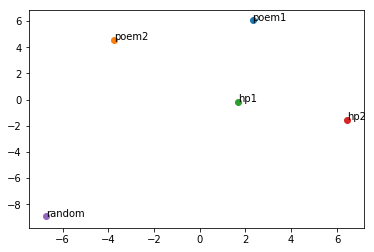

In [71]:
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(euc_dist_str)  # shape (n_components, n_samples)
xs, ys = pos[:, 0], pos[:, 1]

# short versions of filenames:
# convert 'data/austen-brontë/Austen_Emma.txt' to 'Austen_Emma'

text_name = names_text

for x, y, name in zip(xs, ys, text_name):
    plt.scatter(x, y)
    plt.text(x, y, name)

plt.show()

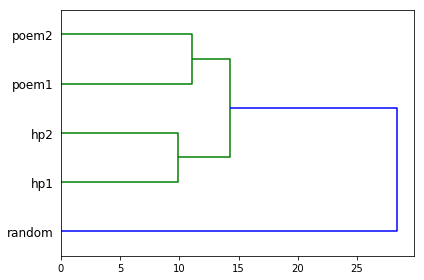

In [72]:

linkage_matrix = ward(euc_dist_str)

dendrogram(linkage_matrix, orientation="right", labels=names_text)

plt.tight_layout()  # fixes margins

plt.show()